#                                    Deep Neural Network From Scratch 

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Scientific and vector computation for python
import numpy as np
# Optimization module in scipy
from scipy import optimize
from keras.utils import np_utils


In [ ]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """Initializing weitghs for all neurons between given input layer 'L_in'
       and output layer 'L_out' to some initila value different from each 
       other hence avoiding 'PROBLEM OF SYMMETRIC WEIGHTS' 
       NOTE:this fucntion take layer l as L_in and layer l+1 as layer L_out and 
       return a matrix of shape (L_out)*(L_in +1) 
    """
    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

In [ ]:

def sigmoid(z):
    """Computes the sigmoid of z.
    """
    g =1.0 / (1.0 + np.exp(-z))
    return g

In [ ]:
def sigmoidGradient(z):
    """Computes the gradient of sigmoid of z.
    """
    g = np.zeros(z.shape)
    g = sigmoid(z) * (1 - sigmoid(z))
    return g

In [ ]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = y.size
    colOFonesFora1=np.ones([m,1], dtype = int)
    a1=np.c_[colOFonesFora1,X]
    z2=a1.dot(Theta1.T)
    # Calculate activations in the second layer.
    a2=sigmoid(z2)
    colOfonesFora2=np.ones([m,1], dtype = int)
    a2=np.c_[colOfonesFora2,a2]
    z3=a2.dot(Theta2.T)
    # Calculate the activation of the third layer.
    a3=sigmoid(z3)
	#a3 is a 5000by10 matrix
    #converts y into vecot if it was vector
    y_matrix = y.reshape(-1)
    '''we had vector of y with each value of vetor ith indicating 
    value of corresponding X in feature vector ith we have to convert 
    eaach value into row of 10 values '''
    y_matrix = np.eye(num_labels)[y_matrix]
    #prepariring regularization terms
    temp1 = Theta1
    temp2 = Theta2
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    #this (temp1[:, 1:] is chosing all of theta apart from first rwo of bais terms
    J=(-1/ (m))*(np.sum((y_matrix*(np.log(a3)))+((1-y_matrix)*np.log(1-a3))))+reg_term
    
    #instead of using loop we are caculating delta vectoried
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))
    
    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)
    
    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
    
    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
   
    
    # ================================================================
    # Unroll gradients
    # grad = np.concatenate([Theta1_grad.ravel(order=order), Theta2_grad.ravel(order=order)])
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad

In [ ]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    Outputs the predicted label of X given the trained weights of a neural
    network(Theta1, Theta2)
    """
    # Useful values
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
    p = np.argmax(h2, axis=1)
    return p


11493376/11490434 [==============================] - 63s 5us/step


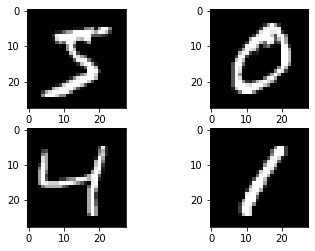

Training Set Accuracy: 100.000000
Test Set Accuracy: 98.460000


In [4]:
 #load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
'''The training dataset is structured as a 3-dimensional array of instance,
 image width and image height. For a multi-layer perceptron model we must 
 reduce the images down into a vector of pixels. In this case the 28×28 
 sized images will be 784 pixel input values.
 We can also reduce our memory requirements by forcing the precision of 
 the pixel values to be 32 bit, the default precision used by Keras anyway.'''

num_pixels = X_train.shape[1] * X_train.shape[2]#num_pixels=row*column
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

'''The pixel values are gray scale between 0 and 255. It is almost always
 a good idea to perform some scaling of input values when using neural 
 network models. Because the scale is well known and well behaved, we
 can very quickly normalize the pixel values to the range 0 and 1 by 
 dividing each value by the maximum of 255.'''
 
 # normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[0]

input_layer_size=num_pixels
hidden_layer_size=800
output_layer_size=10

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size,output_layer_size)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)
lambda_ = 0.5

J, _ = nnCostFunction(initial_nn_params, input_layer_size, hidden_layer_size,
                      output_layer_size,X_train,y_train, lambda_)

options= {'maxiter': 400}
#  You should also try different values of lambda
#lambda_ = 3

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        output_layer_size,X_train,y_train, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
nn_params = res.x
        
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (output_layer_size, (hidden_layer_size + 1)))

pred = predict(Theta1, Theta2, X_train)
print('Training Set Accuracy: %f' % (np.mean(pred == y_train) * 100))
pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy: %f' % (np.mean(pred == y_test) * 100))